This shall contain the codes related to time based analysis for the city(borough wise too).

We first segregate the accidents day-time wise and then we plot the pie chart based on the number of accidents. We then also try to segregate them based on the fatality of the accidents and form an inference from it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import time


In [2]:
df = pd.read_csv("Dataset5.csv")
df.drop(columns=['CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], inplace=True)
df.dropna(subset=['BOROUGH'], inplace=True)
df.dropna(subset=['LATITUDE', 'LONGITUDE'], inplace=True)
df = df[df['LATITUDE']!=0]
df = df[df['LONGITUDE']!=0]

In [3]:
time1 = time(6,00,00)
time2 = time(12,00,00)
time3 = time(16,30,00)
time4 = time(22,00,00)

def custom_time_func(row,time1,time2,time3,time4):
    if row['CRASH TIME']>=str(time4) or row['CRASH TIME']<str(time1):
        return "MID NIGHT"
    elif row['CRASH TIME']>=str(time1) and row['CRASH TIME']<str(time2):
        return "MORNING"
    elif row['CRASH TIME']>=str(time2) and row['CRASH TIME']<str(time3):
        return "AFTERNOON"
    elif row['CRASH TIME']>= str(time3) and row['CRASH TIME']<str(time4):
        return "NIGHT"

In [4]:
def plot_pie_chart(df,title):
    plt.pie(df,labels = df.index,
                    autopct = '%1.1f%%',shadow = True,
                    startangle = 0,
                    wedgeprops = {"edgecolor":"black",
                            'linewidth': 2,
                            'antialiased': True})
    plt.axis('equal')  
    plt.title(title)


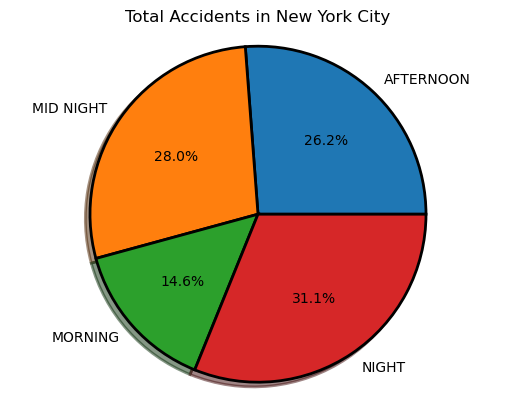

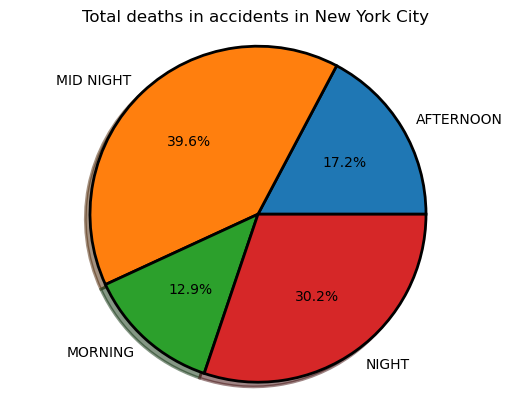

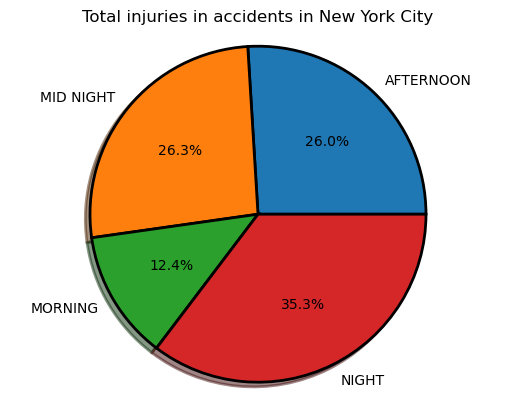

In [5]:
df1 = df
df1['CRASH_DAYTIME'] = df1.apply(custom_time_func,args=(time1,time2,time3,time4),axis=1)
df2 = df1.groupby('CRASH_DAYTIME')
df3 = df2.size()
plot_pie_chart(df3,"Total Accidents in New York City")
plt.show()

df5 = df1.groupby(by='CRASH_DAYTIME')['NUMBER OF PERSONS KILLED'].sum()
df5 = pd.Series(df5)
plot_pie_chart(df5,"Total deaths in accidents in New York City ")
plt.show()

df5 = df1.groupby(by='CRASH_DAYTIME')['NUMBER OF PERSONS INJURED'].sum()
df5 = pd.Series(df5)
plot_pie_chart(df5,"Total injuries in accidents in New York City")
plt.show()



/tmp/ipykernel_6016/15217167.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in groups:


BRONX
BROOKLYN
MANHATTAN
QUEENS
STATEN ISLAND


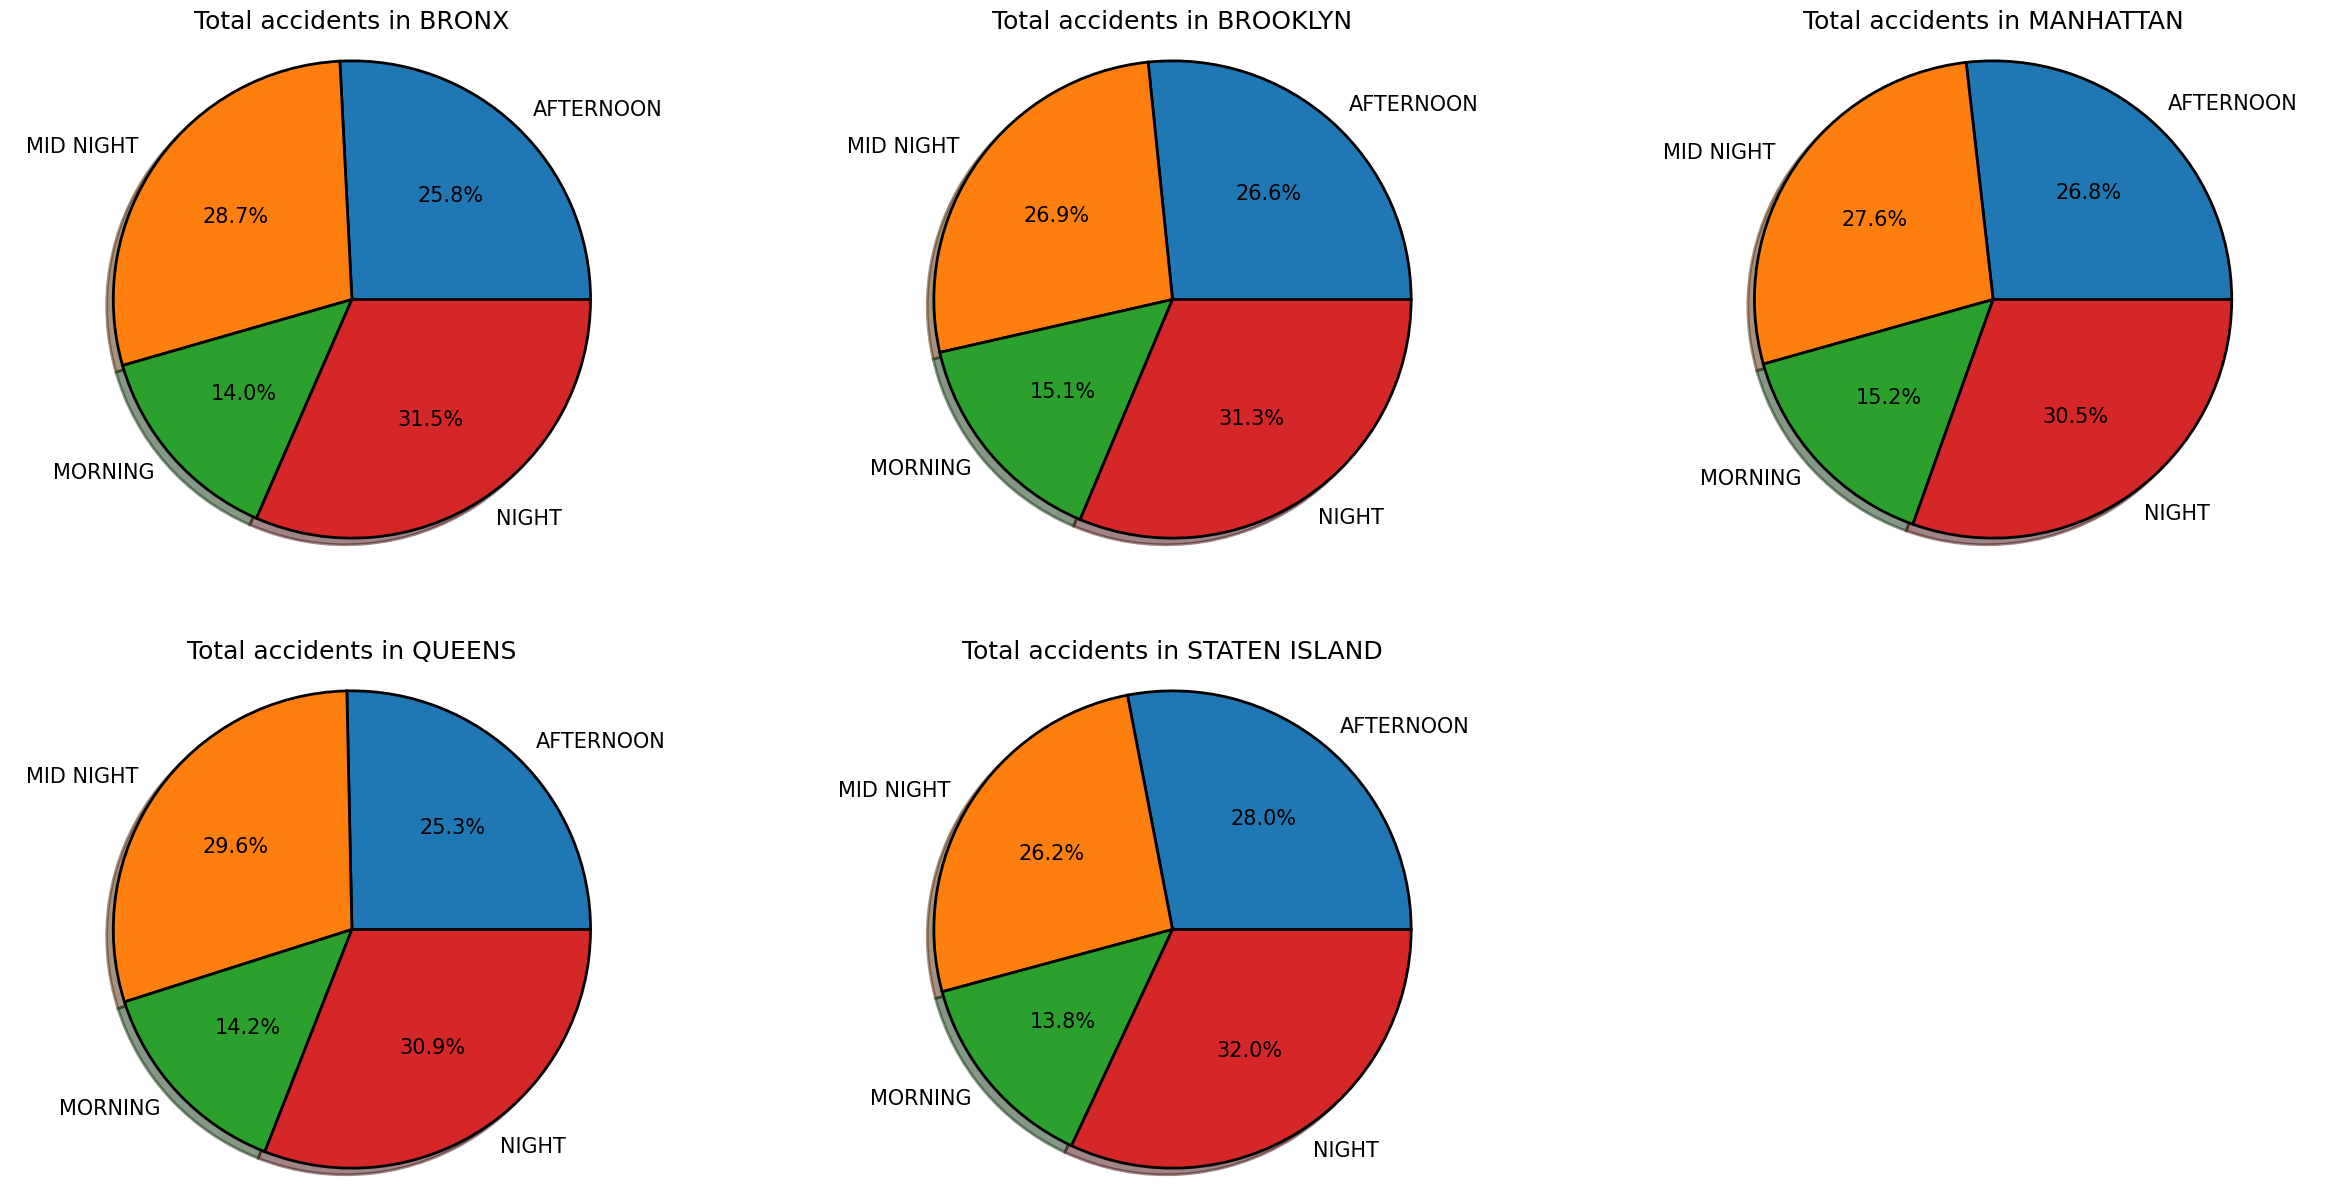

/tmp/ipykernel_6016/15217167.py:18: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in groups:


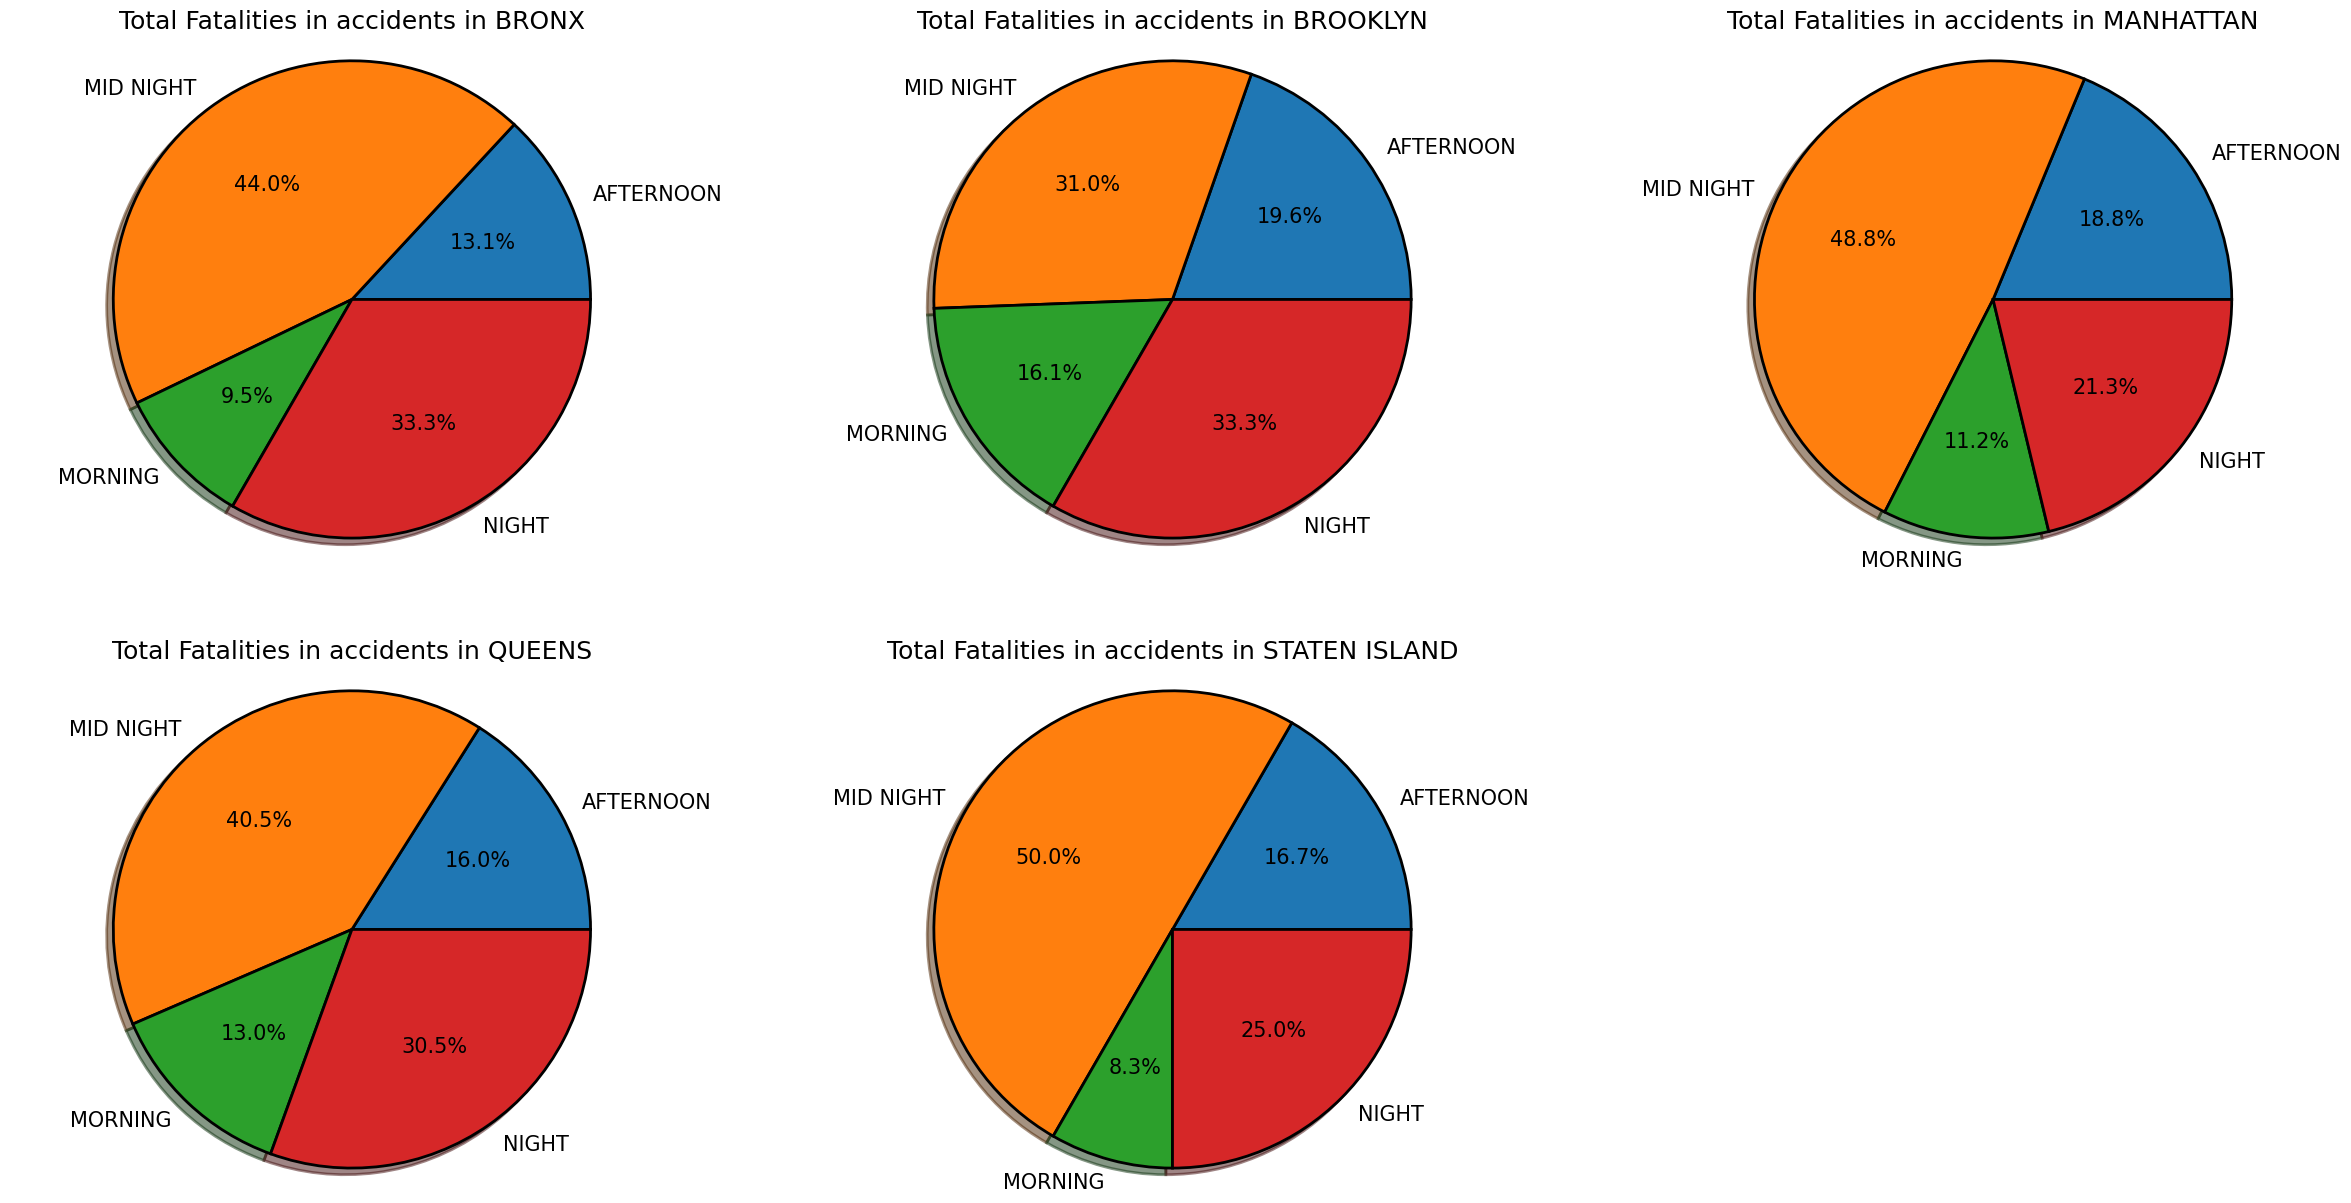

/tmp/ipykernel_6016/15217167.py:27: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in groups:


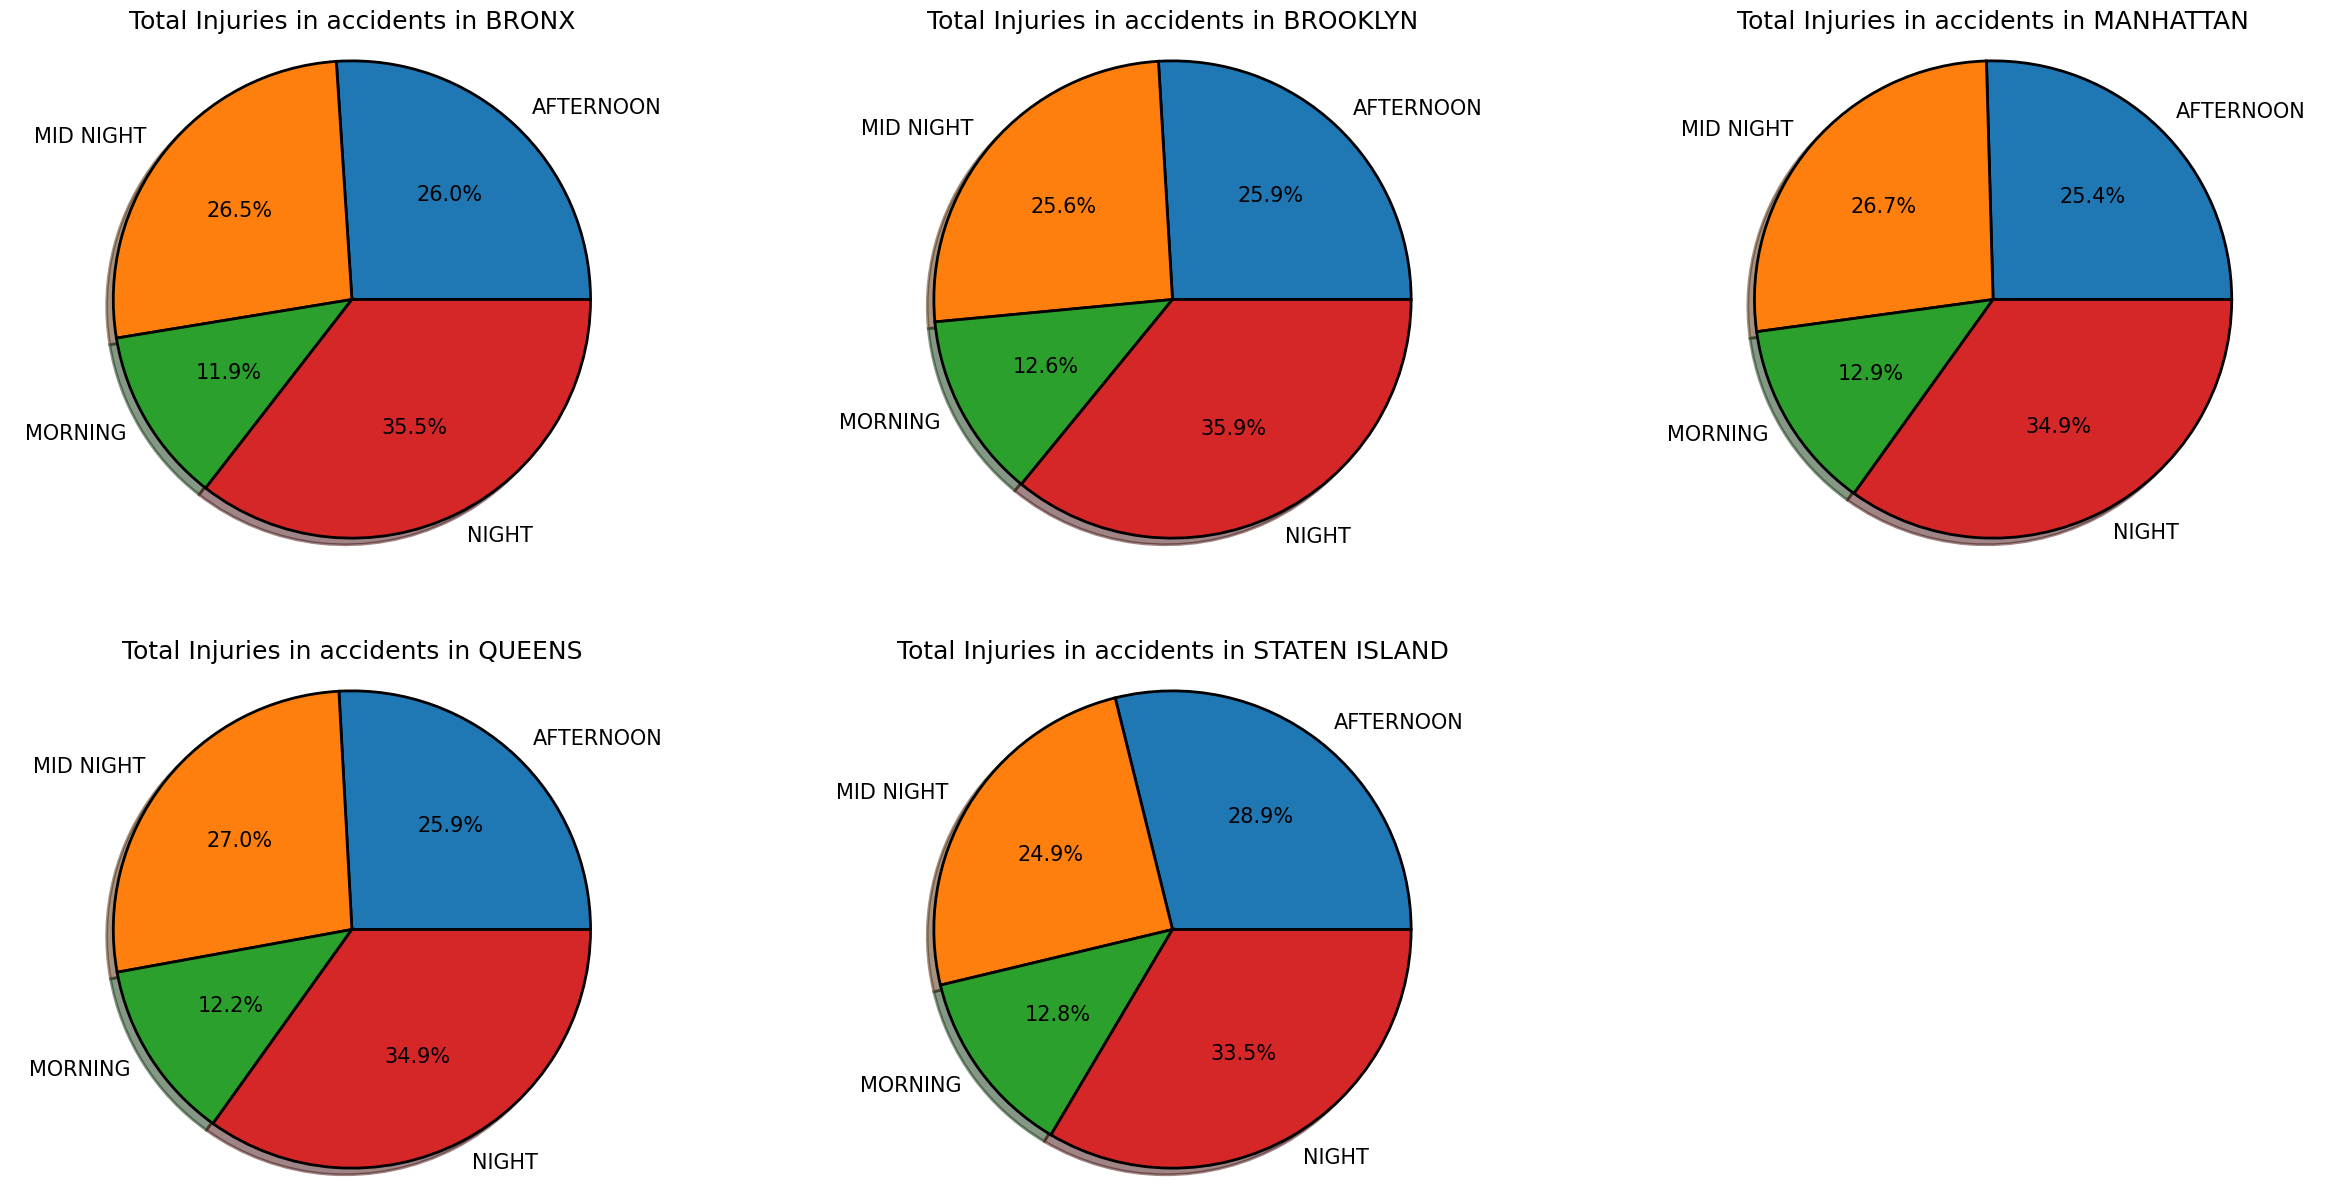

In [6]:
groups = df.groupby(by=['BOROUGH'])

plt.rcParams['figure.figsize'] = (30,15)
plt.rcParams.update({'font.size': 15})

val1=1
val2=1
val3=1
for name, group in groups:
        print(name)
        group['CRASH_DAYTIME'] = group.apply(custom_time_func,args=(time1,time2,time3,time4),axis=1)
        df3 = group.groupby('CRASH_DAYTIME')
        df4 = df3.size()
        plt.subplot(2,3,val1)
        plot_pie_chart(df4,"Total accidents in "+name)
        val1+=1
plt.show()
for name, group in groups:
        group['CRASH_DAYTIME'] = group.apply(custom_time_func,args=(time1,time2,time3,time4),axis=1)
        df3 = group.groupby('CRASH_DAYTIME')
        df5 = group.groupby(by='CRASH_DAYTIME')['NUMBER OF PERSONS KILLED'].sum()
        df5 = pd.Series(df5)
        plt.subplot(2,3,val2)
        plot_pie_chart(df5,"Total Fatalities in accidents in "+name)
        val2+=1
plt.show()
for name, group in groups:
        group['CRASH_DAYTIME'] = group.apply(custom_time_func,args=(time1,time2,time3,time4),axis=1)
        df5 = group.groupby(by='CRASH_DAYTIME')['NUMBER OF PERSONS INJURED'].sum()
        df5 = pd.Series(df5)
        plt.subplot(2,3,val3)
        plot_pie_chart(df5,"Total Injuries in accidents in "+name)
        val3+=1
plt.show()       
